### 0) Environment preparation
These settings are provided for you. You do not need to make any changes.

In [2]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

### 2) Import and explore data

#### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations

In [3]:
# Load the covid cases and vaccine data sets as cov and vac respectively
cov = pd.read_csv("covid_19_uk_cases.csv")
vac = pd.read_csv("covid_19_uk_vaccinated.csv")

# Explore the DataFrames with the appropriate functions

In [194]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB


In [195]:
print(cov.shape)

(7584, 12)


In [196]:
cov.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


In [199]:
cov.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64

In [200]:
cov.fillna(0, inplace=True)

# Filter/subset data

In [4]:
cov_fcol = pd.read_csv("covid_19_uk_cases.csv", 
                            usecols=['Province/State',
                                     'Country/Region',
                                     'Date',
                                     'Deaths',
                                     'Cases',
                                     'Recovered',
                                     'Hospitalised'])
cov_fcol.head()

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,22/01/2020,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,23/01/2020,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,24/01/2020,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,25/01/2020,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,26/01/2020,0.0,0.0,0.0,0.0


# Aggregate data (totals and by month)

In [5]:
cov_fcol["Date"] = pd.to_datetime(cov_fcol["Date"])
cov_fcol.head()

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,2020-01-26,0.0,0.0,0.0,0.0


In [6]:
cov_fcol['Year/Month']=cov_fcol['Date'].dt.to_period('M')
cov_fcol.head()

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Year/Month
0,Anguilla,United Kingdom,2020-01-22,0.0,0.0,0.0,0.0,2020-01
1,Anguilla,United Kingdom,2020-01-23,0.0,0.0,0.0,0.0,2020-01
2,Anguilla,United Kingdom,2020-01-24,0.0,0.0,0.0,0.0,2020-01
3,Anguilla,United Kingdom,2020-01-25,0.0,0.0,0.0,0.0,2020-01
4,Anguilla,United Kingdom,2020-01-26,0.0,0.0,0.0,0.0,2020-01


In [7]:
# Determine the number of cases by date
cov_fcol.groupby(["Province/State",
                  "Year/Month"])[["Deaths",
                                  "Cases","Recovered",
                                  "Hospitalised"]].sum().sort_values("Deaths", 
                                                                     ascending=False)                                                                                       

Deaths        Cases  Recovered  \
Province/State              Year/Month                                      
Others                      2021-08     3731388.0  174152464.0        0.0   
                            2021-07     3678374.0  156259675.0        0.0   
                            2021-09     3671929.0  186323789.0        0.0   
                            2021-05     3649461.0  134841456.0        0.0   
                            2021-03     3615672.0  131336920.0        0.0   
...                                           ...          ...        ...   
Falkland Islands (Malvinas) 2020-04           0.0        316.0      214.0   
                            2020-05           0.0        357.0      353.0   
                            2020-06           0.0        344.0      340.0   
                            2020-07           0.0        357.0      353.0   
Anguilla                    2020-01           0.0         29.0       24.0   

                                        Hospitalised  
Province/State              Year/Month                
Others                      2021-08          12441.0  
                            2021-07          10638.0  
                            2021-09          12799.0  
                            2021-05           6331.0  
                            2021-03          11133.0  
...                                              ...  
Falkland Islands (Malvinas) 2020-04          32464.0  
                            2020-05          20132.0  
                            2020-06          12235.0  
                            2020-07           8705.0  
Anguilla                    2020-01           7569.0  

[288 rows x 4 columns]

In [ ]:
print(cov_fcol.dtypes)

In [8]:
cov_fcol.groupby("Year/Month")["Cases"].sum()
cov_fcol.head()

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Year/Month
0,Anguilla,United Kingdom,2020-01-22,0.0,0.0,0.0,0.0,2020-01
1,Anguilla,United Kingdom,2020-01-23,0.0,0.0,0.0,0.0,2020-01
2,Anguilla,United Kingdom,2020-01-24,0.0,0.0,0.0,0.0,2020-01
3,Anguilla,United Kingdom,2020-01-25,0.0,0.0,0.0,0.0,2020-01
4,Anguilla,United Kingdom,2020-01-26,0.0,0.0,0.0,0.0,2020-01


## Exploring Covid 19 Vaccinated Data

In [201]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB


In [202]:
vac.describe()

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,69619.000000,94038.000000,69619.000000


In [204]:
vac.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

# Filter/subset data

In [9]:
vac_fcol = pd.read_csv("covid_19_uk_vaccinated.csv", 
                            usecols=['Province/State',
                                     'Country/Region',                                                      
                                     'Date',                        
                                     'Vaccinated',                  
                                     'First Dose',                  
                                     'Second Dose'])
vac_fcol.head()

,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,22/01/2020,0,0,0
1,Anguilla,United Kingdom,23/01/2020,0,0,0
2,Anguilla,United Kingdom,24/01/2020,0,0,0
3,Anguilla,United Kingdom,25/01/2020,0,0,0
4,Anguilla,United Kingdom,26/01/2020,0,0,0


# Aggregate data (totals and by month)

In [10]:
vac_fcol['Year/Month']=pd.to_datetime(vac_fcol["Date"]).dt.to_period('M')
vac_fcol.head()

,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Year/Month
0,Anguilla,United Kingdom,22/01/2020,0,0,0,2020-01
1,Anguilla,United Kingdom,23/01/2020,0,0,0,2020-01
2,Anguilla,United Kingdom,24/01/2020,0,0,0,2020-01
3,Anguilla,United Kingdom,25/01/2020,0,0,0,2020-01
4,Anguilla,United Kingdom,26/01/2020,0,0,0,2020-01


In [11]:
vac_fcol.groupby(["Province/State",
                  "Year/Month"])[["Vaccinated",
                                  "First Dose",
                                  "Second Dose"]].sum().sort_values("Vaccinated", 
                                                                    ascending=False)                                                                                                                                          

Vaccinated  First Dose  Second Dose
Province/State              Year/Month                                     
Gibraltar                   2021-04        1037794      439121      1037794
                            2021-05        1033628      632644      1033628
Montserrat                  2021-04         954770      403989       954770
                            2021-05         950943      582036       950943
British Virgin Islands      2021-04         913258      386424       913258
...                                            ...         ...          ...
Falkland Islands (Malvinas) 2020-07              0           0            0
                            2020-08              0           0            0
                            2020-09              0           0            0
                            2020-10              0           0            0
Gibraltar                   2020-01              0           0            0

[288 rows x 3 columns]

# Create DataFrame based on Gibraltar data

In [12]:
gib_cov=cov_fcol[cov['Province/State']=='Gibraltar']
gib_cov.head()

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Year/Month
3792,Gibraltar,United Kingdom,2020-01-22,0.0,0.0,0.0,0.0,2020-01
3793,Gibraltar,United Kingdom,2020-01-23,0.0,0.0,0.0,0.0,2020-01
3794,Gibraltar,United Kingdom,2020-01-24,0.0,0.0,0.0,0.0,2020-01
3795,Gibraltar,United Kingdom,2020-01-25,0.0,0.0,0.0,0.0,2020-01
3796,Gibraltar,United Kingdom,2020-01-26,0.0,0.0,0.0,0.0,2020-01


# Explore behaviour over time

In [13]:
gibr_fcol = gib_cov[['Year/Month','Deaths','Cases','Recovered','Hospitalised']]

pd.set_option("display.max_rows", None)

gibr_fcol.head()

,Year/Month,Deaths,Cases,Recovered,Hospitalised
3792,2020-01,0.0,0.0,0.0,0.0
3793,2020-01,0.0,0.0,0.0,0.0
3794,2020-01,0.0,0.0,0.0,0.0
3795,2020-01,0.0,0.0,0.0,0.0
3796,2020-01,0.0,0.0,0.0,0.0


In [15]:
gibr_fcol.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


In [14]:
gibr=gibr_fcol.groupby(["Year/Month"])[["Deaths",
                                         "Cases",
                                         "Hospitalised",
                                         "Recovered"]].sum().sort_values("Year/Month") 
gibr.head()

,Deaths,Cases,Hospitalised,Recovered
Year/Month,,,,
2020-01,5.0,3194.0,9012.0,2830.0
2020-02,5.0,3223.0,9035.0,2862.0
2020-03,5.0,3737.0,15325.0,3042.0
2020-04,5.0,5727.0,50732.0,5058.0
2020-05,5.0,6245.0,31457.0,5728.0


# Explore and note observations
### Are there any of the visualisations that could be added here to make it easier?

<AxesSubplot:>

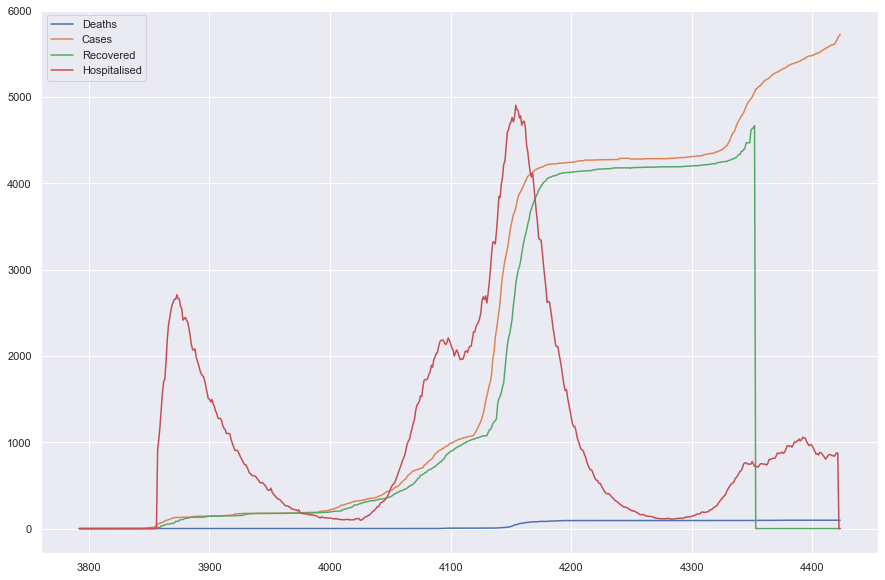

In [16]:
gibr_fcol.plot()

By initial exploration I understand that there’s pick in hospitalisations data entries. Narrowing the observation down, as to the Gibraltar region, the number of hospitalisations increased sharply in the first quarter of the data observed, while the number of cases didn’t. Which could indicate that the number of cases was either not being registered properly at the time, due to either not testing availability or missing information. By the middle of the data and graph observed, I can see that the hospitalisations and number of cases grow or decrease in a parallel level.

In [17]:
gibr.reset_index(inplace=True)
gibr.head()

,Year/Month,Deaths,Cases,Hospitalised,Recovered
0,2020-01,5.0,3194.0,9012.0,2830.0
1,2020-02,5.0,3223.0,9035.0,2862.0
2,2020-03,5.0,3737.0,15325.0,3042.0
3,2020-04,5.0,5727.0,50732.0,5058.0
4,2020-05,5.0,6245.0,31457.0,5728.0


<AxesSubplot:xlabel='Year/Month'>

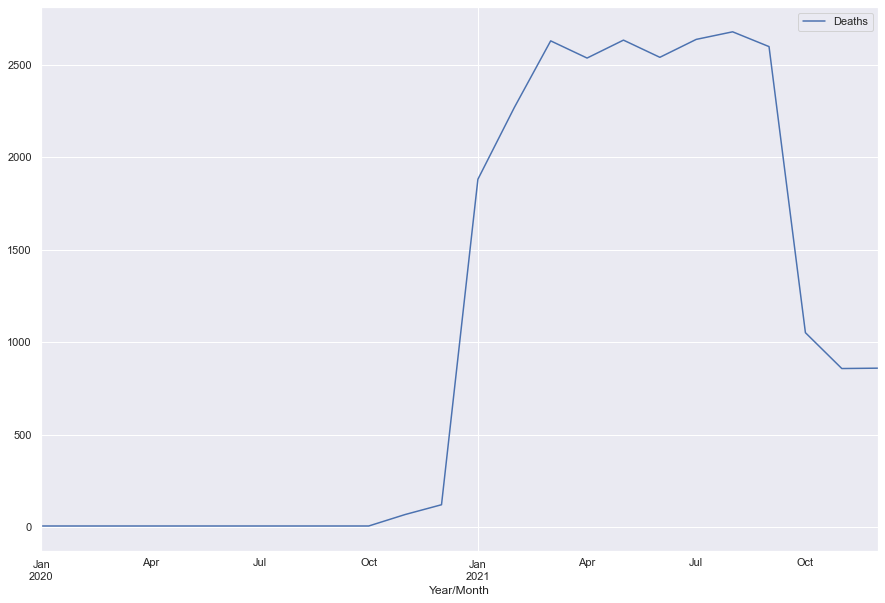

In [18]:
gibr.plot(x="Year/Month", y="Deaths")

The number of deaths was showing small in relation to number of cases and hospitalizations in the data set; hence deaths are being observed in this separates graph. 
From the deaths’ graph, we can see a more comprehensive picture of number by month. This shows than in October 2020 the number of deaths started to increase. In January this increase was remarkably high and continued until October 2021 when it decreased.

<AxesSubplot:xlabel='Year/Month'>

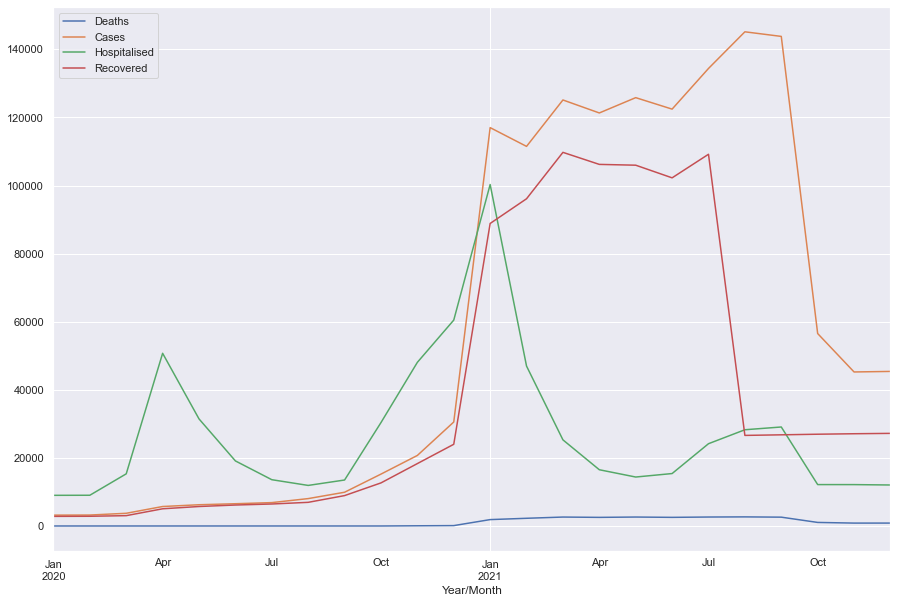

In [19]:
gibr.plot(x="Year/Month")

From the above graph we can see a more detailed illustration of the numbers by dates. In the last quarter of the data sets, further observations show that the recoveries registration stopped being gathered as this information drops to zero. The number of deaths is small in comparison to the high number of cases and hospitalizations; hence deaths are observed in a separate graph. 

In [ ]:
gib_cov[['Deaths','Cases','Recovered','Hospitalised']].sum()

In [ ]:
vac_fcol[['First Dose','Second Dose']].sum()

In [20]:
gib_vac=vac_fcol[cov['Province/State']=='Gibraltar']
gib_vac.head()

,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Year/Month
3792,Gibraltar,United Kingdom,22/01/2020,0,0,0,2020-01
3793,Gibraltar,United Kingdom,23/01/2020,0,0,0,2020-01
3794,Gibraltar,United Kingdom,24/01/2020,0,0,0,2020-01
3795,Gibraltar,United Kingdom,25/01/2020,0,0,0,2020-01
3796,Gibraltar,United Kingdom,26/01/2020,0,0,0,2020-01


In [21]:
gibr_v_fcol = gib_vac[['Year/Month','Vaccinated','First Dose','Second Dose']]
gibr_v_fcol.head()

,Year/Month,Vaccinated,First Dose,Second Dose
3792,2020-01,0,0,0
3793,2020-01,0,0,0
3794,2020-01,0,0,0
3795,2020-01,0,0,0
3796,2020-01,0,0,0


In [ ]:
gibr_v_fcol.describe()

In [22]:
gibr_v=gibr_v_fcol.groupby(["Year/Month"])[["Vaccinated",
                                         "First Dose",
                                         "Second Dose"]].sum().sort_values("Year/Month") 
gibr_v.head()                                       

,Vaccinated,First Dose,Second Dose
Year/Month,,,
2020-01,0,0,0
2020-02,0,0,0
2020-03,0,0,0
2020-04,0,0,0
2020-05,0,0,0


<AxesSubplot:>

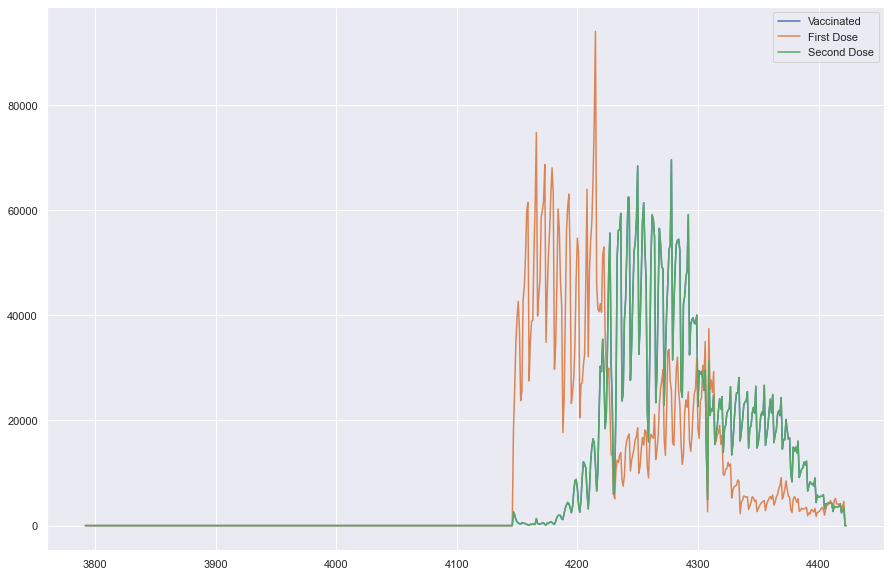

In [23]:
gibr_v_fcol.plot()

In [24]:
gibr_v.reset_index(inplace=True)
gibr_v.head()

,Year/Month,Vaccinated,First Dose,Second Dose
0,2020-01,0,0,0
1,2020-02,0,0,0
2,2020-03,0,0,0
3,2020-04,0,0,0
4,2020-05,0,0,0


<AxesSubplot:xlabel='Year/Month'>

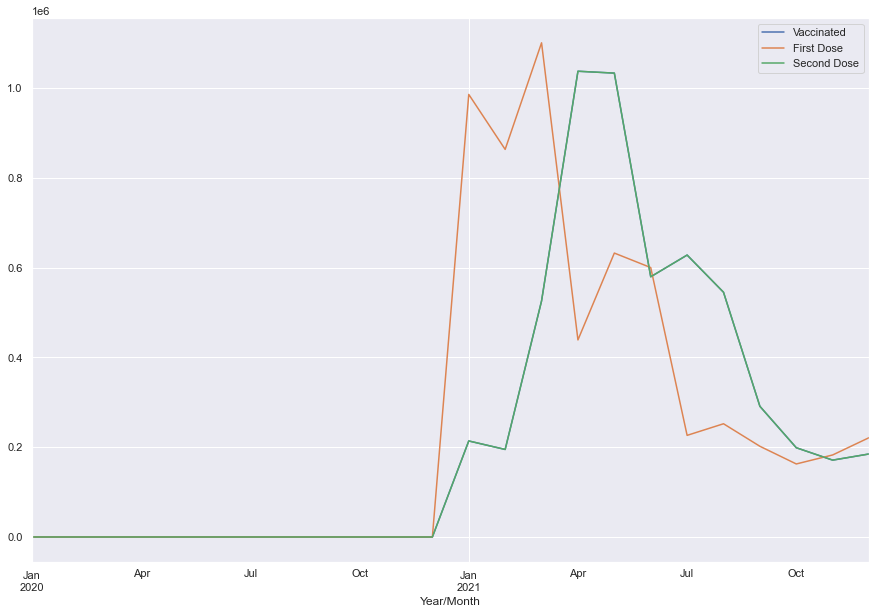

In [25]:
gibr_v.plot(x="Year/Month")

# Comments:

The number of vaccinated people changed over time; this is shown by the data indicating that more people got the first dose in January 2021. Only few numbers of people received the second dose soon after the first dose. Majority of people came forward to receive the second dose from March 2021. They came in a steadier number than the rate on what they receive the first dose. Reasons for it could had been due to the government program to make doses availability to other group of people who had not received the first dose yet. 

#### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment two considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

### 3) Merge and analyse the data

#### 3.1) Report expectations:
- Merge and explore the data
- Convert the data type of the Date column from object to datetime
- Create a dataset that meets the expected parameters
- Add calculated features to dataframes (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised.

In [26]:
# Join the DataFrames as covid where you merge cov and vac
covid= pd.merge(cov, vac)
covid.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,22/01/2020,0.0,0.0,0.0,0.0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,23/01/2020,0.0,0.0,0.0,0.0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,24/01/2020,0.0,0.0,0.0,0.0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,25/01/2020,0.0,0.0,0.0,0.0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,26/01/2020,0.0,0.0,0.0,0.0,0,0,0


In [205]:
# Explore the new DataFrame
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 7583
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Province/State            7584 non-null   object        
 1   Country/Region            7584 non-null   object        
 2   Lat                       7584 non-null   float64       
 3   Long                      7584 non-null   float64       
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object        
 5   Sub-region Name           7584 non-null   object        
 6   Intermediate Region Code  7584 non-null   int64         
 7   Date                      7584 non-null   datetime64[ns]
 8   Deaths                    7582 non-null   float64       
 9   Cases                     7582 non-null   float64       
 10  Recovered                 7582 non-null   float64       
 11  Hospitalised              7582 non-null   float64       
 12  Vaccinated          

In [206]:
print(covid.shape)

(7584, 15)


In [207]:
covid.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000,69619.000000,94038.000000,69619.000000


In [208]:
covid.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

In [27]:
# Fix the date column data type / Convert the data type of the Date column from object to datetime
covid["Date"] = pd.to_datetime(covid["Date"])
print(covid.dtypes)

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object


In [ ]:
# view the DataFrame
print(covid.columns)

In [70]:
# Clean up / drop unnecessary columns 
covid_new=covid.drop(['Country/Region','Lat', 'Long', 'ISO 3166-1 Alpha 3-Codes', 
                     'Sub-region Name','Intermediate Region Code',
                     'Intermediate Region Code'], axis=1)
covid_new.head()                     

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
1,Anguilla,2020-01-23,0.0,0.0,0.0,0.0,0,0,0
2,Anguilla,2020-01-24,0.0,0.0,0.0,0.0,0,0,0
3,Anguilla,2020-01-25,0.0,0.0,0.0,0.0,0,0,0
4,Anguilla,2020-01-26,0.0,0.0,0.0,0.0,0,0,0


In [71]:
covid_new['Year/Month']=cov_fcol['Date'].dt.to_period('M')
covid_new.head()

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Year/Month
0,Anguilla,2020-01-22,0.0,0.0,0.0,0.0,0,0,0,2020-01
1,Anguilla,2020-01-23,0.0,0.0,0.0,0.0,0,0,0,2020-01
2,Anguilla,2020-01-24,0.0,0.0,0.0,0.0,0,0,0,2020-01
3,Anguilla,2020-01-25,0.0,0.0,0.0,0.0,0,0,0,2020-01
4,Anguilla,2020-01-26,0.0,0.0,0.0,0.0,0,0,0,2020-01


In [72]:
covid_new['Year/Month']=covid_new['Year/Month'].astype(str)

In [73]:
covid_new['Year/Month']=pd.to_datetime(covid_new['Year/Month'])

In [32]:
print(covid_new.dtypes)

Province/State            object
Date              datetime64[ns]
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Year/Month        datetime64[ns]
dtype: object


## Calculate the difference between first and second dose

In [74]:
covid_new['Difference']=covid_new['First Dose']-covid_new['Second Dose']
covid_new.head()

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Year/Month,Difference
0,Anguilla,2020-01-22,0.0,0.0,0.0,0.0,0,0,0,2020-01-01,0
1,Anguilla,2020-01-23,0.0,0.0,0.0,0.0,0,0,0,2020-01-01,0
2,Anguilla,2020-01-24,0.0,0.0,0.0,0.0,0,0,0,2020-01-01,0
3,Anguilla,2020-01-25,0.0,0.0,0.0,0.0,0,0,0,2020-01-01,0
4,Anguilla,2020-01-26,0.0,0.0,0.0,0.0,0,0,0,2020-01-01,0


In [75]:
doses=covid_new.groupby("Province/State")[["First Dose",
                                            "Second Dose",
                                            "Difference"]].sum().sort_values(by='Difference', ascending=False)  
                                                                                                
doses 

,First Dose,Second Dose,Difference
Province/State,,,
Gibraltar,5870786,5606041,264745
Montserrat,5401128,5157560,243568
British Virgin Islands,5166303,4933315,232988
Anguilla,4931470,4709072,222398
Isle of Man,4226984,4036345,190639
Falkland Islands (Malvinas),3757307,3587869,169438
Cayman Islands,3522476,3363624,158852
Channel Islands,3287646,3139385,148261
Turks and Caicos Islands,3052822,2915136,137686


In [76]:
# reset index to have Province/State as column
doses.reset_index(inplace=True)
doses.head()

,Province/State,First Dose,Second Dose,Difference
0,Gibraltar,5870786,5606041,264745
1,Montserrat,5401128,5157560,243568
2,British Virgin Islands,5166303,4933315,232988
3,Anguilla,4931470,4709072,222398
4,Isle of Man,4226984,4036345,190639


<AxesSubplot:xlabel='Province/State'>

<Figure size 1296x432 with 0 Axes>

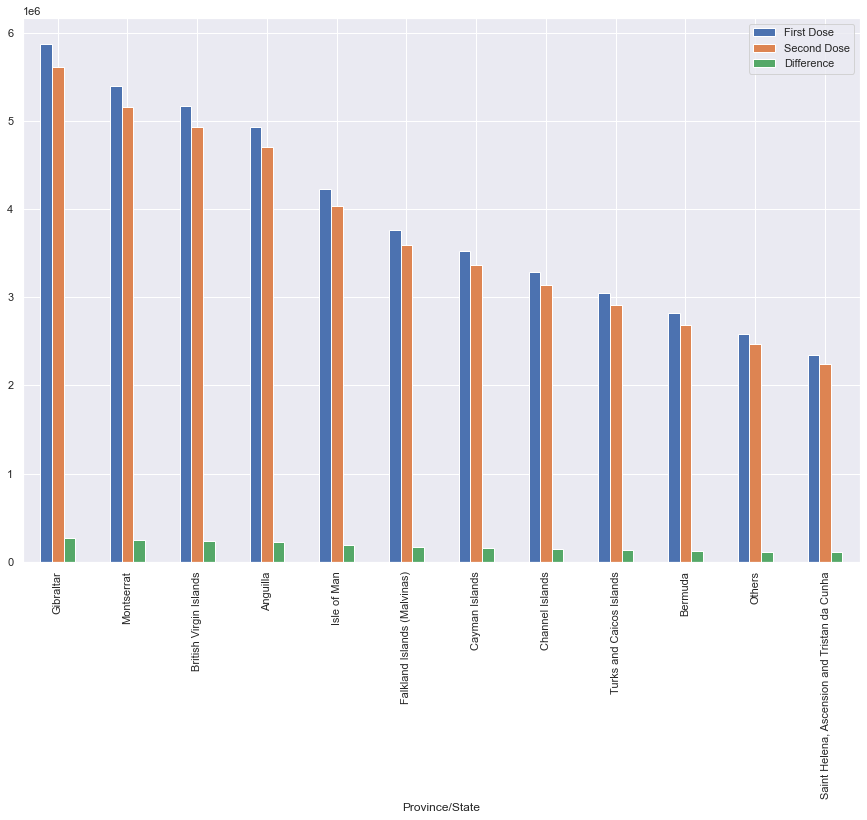

In [36]:
plt.figure(figsize=(18, 6))

doses.plot.bar(x="Province/State", y=["First Dose", "Second Dose", "Difference"])

## Calculate difference between the first and second dose over time

In [77]:
# Groupby and calculate difference between first and second dose over time
time=covid_new.groupby("Year/Month")[["First Dose","Second Dose","Difference"]].sum() 
time.head()

,First Dose,Second Dose,Difference
Year/Month,,,
2020-01-01,0,0,0
2020-02-01,0,0,0
2020-03-01,0,0,0
2020-04-01,0,0,0
2020-05-01,0,0,0


<AxesSubplot:xlabel='Year/Month'>

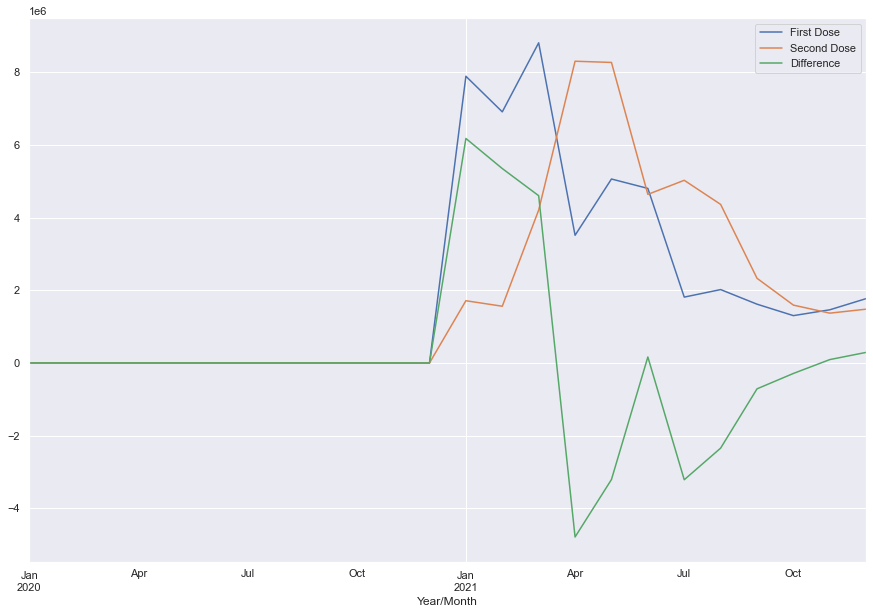

In [78]:
time.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

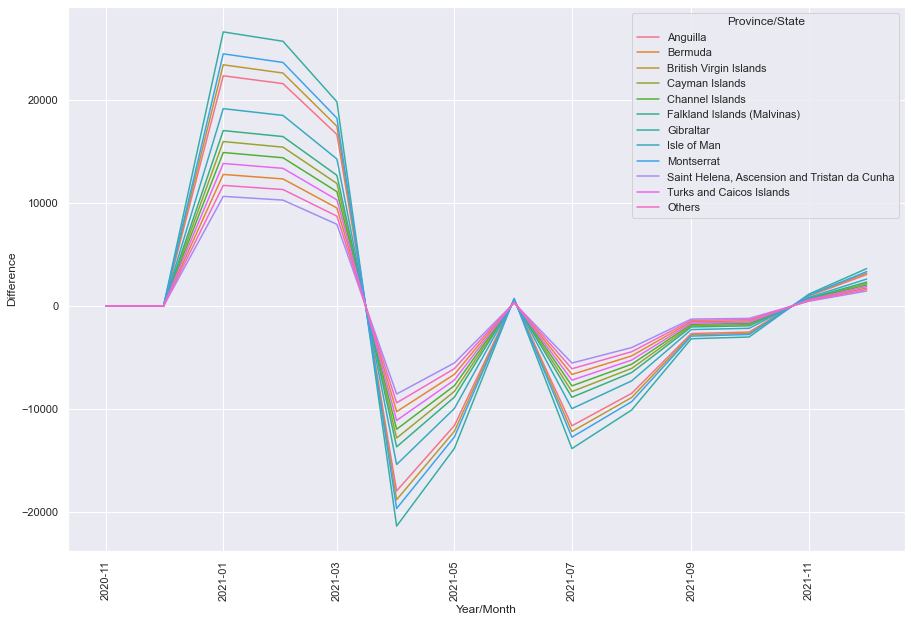

In [79]:
sns.lineplot(x="Year/Month", y="Difference", 
             hue= "Province/State", 
             data=covid_new[covid_new["Year/Month"] > "2020-10"], 
             ci=None,)

plt.xticks(rotation=90)
plt.show

The las graph shows how vaccination difference have changed over the time but now expanded to look at all provinces.
The insights gained from the data trends shows that difference between first and second dose became zero or under after mid March 2021, due to the most people who was called for first dose was also called to second dose after 3 month, hence they became fully vaccinated. In june this difference nearly started to raise, we don't know the exact reason, could be due to supply availability but after June 2021 remained negative, meaning that most people had first and second dose, or negative difference between first and second dose. 

#### 3.2) Presentation expectations:
We use similar calculations and representations as we had in activity 2, but now expand to look at all provinces. Part 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in part 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis

### 4)Visualise and identify initial trends

The government is looking to promote second dose vaccinations and looking for the first area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)
- Visualise both outputs.

#### 4.1) Report expectations:
- Consider additional features (deaths and recoveries)
- Visualise the data
- Note observations
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

#### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Note**: Different features evaluated to improve decision making (deaths and recoveries); why it is important to explore data and use different views; Highlight two or three suggestions to get junior team members started in terms of good practices

In [80]:
# Absolute numbers
doses=covid_new.groupby("Province/State")[["First Dose",
                                            "Second Dose",
                                            "Difference"]].sum().sort_values(by='Difference', ascending=False)  
                                                                                                
doses 

,First Dose,Second Dose,Difference
Province/State,,,
Gibraltar,5870786,5606041,264745
Montserrat,5401128,5157560,243568
British Virgin Islands,5166303,4933315,232988
Anguilla,4931470,4709072,222398
Isle of Man,4226984,4036345,190639
Falkland Islands (Malvinas),3757307,3587869,169438
Cayman Islands,3522476,3363624,158852
Channel Islands,3287646,3139385,148261
Turks and Caicos Islands,3052822,2915136,137686


The actual and relative numbers of individuals per province that received first and second dose. The difference column reflects total number of individuals that still require a second dose per province. The province with the biggest need is Gibraltar.

In [ ]:
# Relative numbers ratio of interest

In [81]:
# ratio of interest on first dose 
doses['Ratio_1']=(doses['First Dose']-doses['Second Dose']) * 100 / doses['First Dose'] 
doses.head()

,First Dose,Second Dose,Difference,Ratio_1
Province/State,,,,
Gibraltar,5870786,5606041,264745,4.509532
Montserrat,5401128,5157560,243568,4.509577
British Virgin Islands,5166303,4933315,232988,4.509763
Anguilla,4931470,4709072,222398,4.509771
Isle of Man,4226984,4036345,190639,4.510048


In [82]:
# ratio of interst on second dose
doses['Ratio_2']=(doses['Second Dose'] * 100 / doses['First Dose'])
doses

,First Dose,Second Dose,Difference,Ratio_1,Ratio_2
Province/State,,,,,
Gibraltar,5870786,5606041,264745,4.509532,95.490468
Montserrat,5401128,5157560,243568,4.509577,95.490423
British Virgin Islands,5166303,4933315,232988,4.509763,95.490237
Anguilla,4931470,4709072,222398,4.509771,95.490229
Isle of Man,4226984,4036345,190639,4.510048,95.489952
Falkland Islands (Malvinas),3757307,3587869,169438,4.509560,95.490440
Cayman Islands,3522476,3363624,158852,4.509669,95.490331
Channel Islands,3287646,3139385,148261,4.509640,95.490360
Turks and Caicos Islands,3052822,2915136,137686,4.510122,95.489878


In [84]:
doses.reset_index(inplace=True)
doses.head()

,Province/State,First Dose,Second Dose,Difference,Ratio_1,Ratio_2
0,Gibraltar,5870786,5606041,264745,4.509532,95.490468
1,Montserrat,5401128,5157560,243568,4.509577,95.490423
2,British Virgin Islands,5166303,4933315,232988,4.509763,95.490237
3,Anguilla,4931470,4709072,222398,4.509771,95.490229
4,Isle of Man,4226984,4036345,190639,4.510048,95.489952


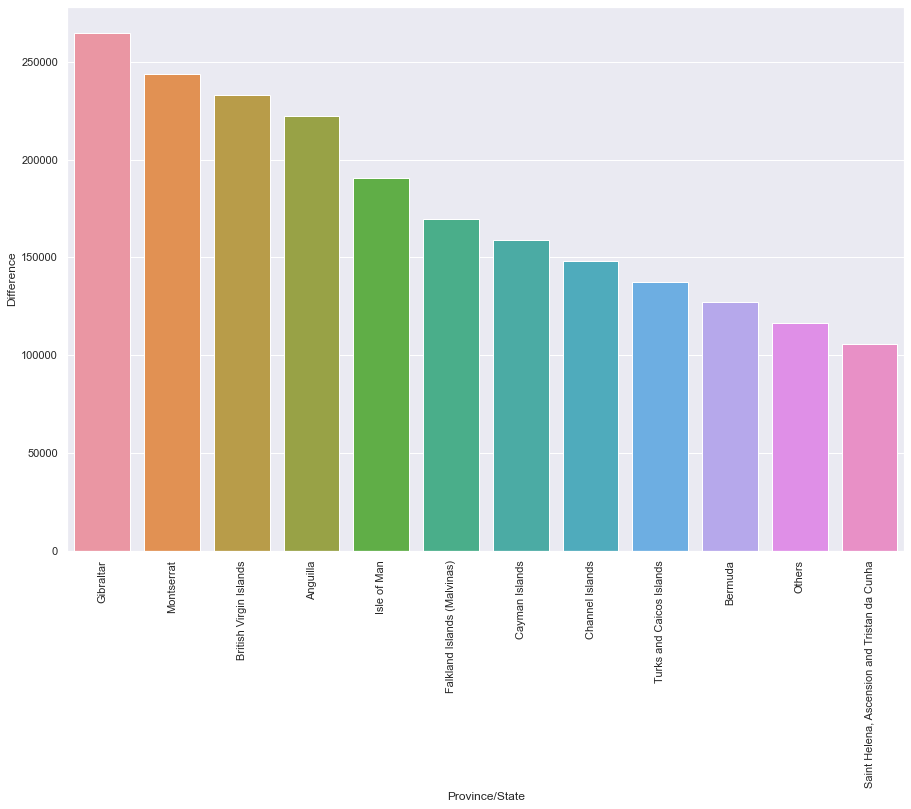

In [85]:
# Visualise

# Vertical bar graph displaying ratio of people who have received the second dose over the first dose.
# With distinct labes. 

sns.barplot(x="Province/State", y="Difference", data=doses)

total = len(doses["Province/State"])

plt.xticks(rotation=90)
plt.show()

The highest number of people who have received a first dose but not a second dose yet by region was Gibraltar (seen from graph above). The government initiative should target Gibraltar, Montserrat, Virgin Island and Anguilla, provinces which have the highest number (actual numbers) of vaccinated people with the first dose and not second dose. Whereas the highest percentage of people fully vaccinated (first and secon dose) is in Saint Helena, due to the number of people who received the first dose being small as well. The ratio of interest of people taking the second jab soon after the first dose was the highest in Saint Helena, Ascension and Tristan da Cunha. 
We are goint to look this figure in further graphs to find out if dates of jabs' abailability could had been one of the reasons for it.

In [86]:
# Let's smooth out the data by looking at monthly figures
covid_new["Date"] = pd.to_datetime(covid_new["Date"])

print(covid_new.dtypes)

Province/State            object
Date              datetime64[ns]
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Year/Month        datetime64[ns]
Difference                 int64
dtype: object


In [87]:
covid_new['Year/Month']=covid_new['Year/Month'].dt.to_period('M')
covid_new.head()

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Year/Month,Difference
0,Anguilla,2020-01-22,0.0,0.0,0.0,0.0,0,0,0,2020-01,0
1,Anguilla,2020-01-23,0.0,0.0,0.0,0.0,0,0,0,2020-01,0
2,Anguilla,2020-01-24,0.0,0.0,0.0,0.0,0,0,0,2020-01,0
3,Anguilla,2020-01-25,0.0,0.0,0.0,0.0,0,0,0,2020-01,0
4,Anguilla,2020-01-26,0.0,0.0,0.0,0.0,0,0,0,2020-01,0


In [88]:
monthly=covid_new.groupby(["Province/State",
                           "Year/Month"])[["First Dose",
                                           "Vaccinated",
                                           "Difference"]].sum().sort_values(by='First Dose',
                                                                            ascending=False)
monthly.head()

,,First Dose,Vaccinated,Difference
Province/State,Year/Month,,,
Gibraltar,2021-03,1101142,525911,575231
Montserrat,2021-03,1013050,483837,529213
Gibraltar,2021-01,986137,213989,772148
British Virgin Islands,2021-03,969006,462803,506203
Anguilla,2021-03,924960,441764,483196


In [92]:
monthly.reset_index(inplace=True)
monthly.head()

,index,Province/State,Year/Month,First Dose,Vaccinated,Difference
0,0,Gibraltar,2021-03,1101142,525911,575231
1,1,Montserrat,2021-03,1013050,483837,529213
2,2,Gibraltar,2021-01,986137,213989,772148
3,3,British Virgin Islands,2021-03,969006,462803,506203
4,4,Anguilla,2021-03,924960,441764,483196


In [93]:
monthly['Year/Month']=monthly['Year/Month'].astype(str)

In [94]:
monthly['Year/Month']=pd.to_datetime(monthly['Year/Month'])

In [95]:
print(monthly.dtypes)

index                      int64
Province/State            object
Year/Month        datetime64[ns]
First Dose                 int64
Vaccinated                 int64
Difference                 int64
dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

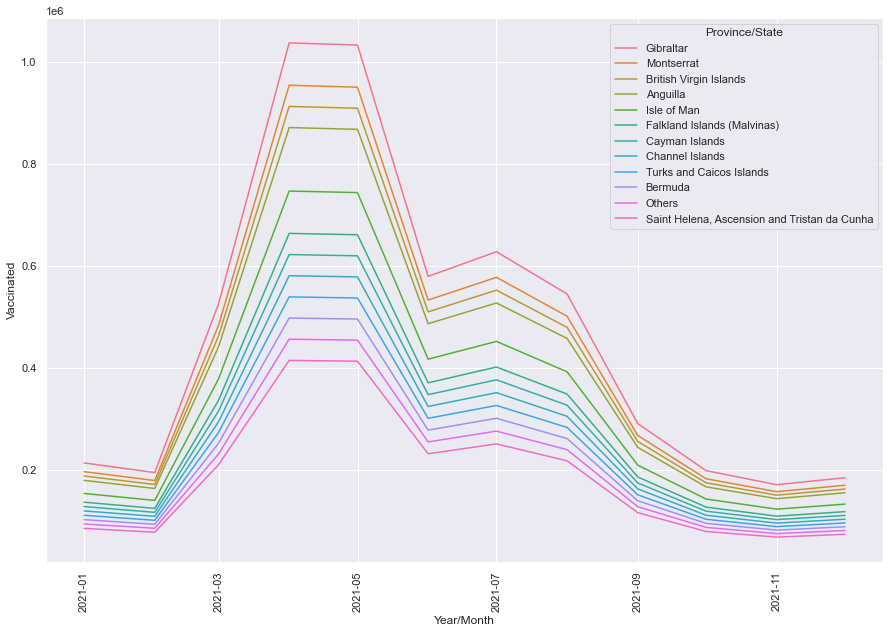

In [96]:
sns.lineplot(x="Year/Month", y="Vaccinated", 
             hue= "Province/State", 
             data=monthly[monthly["Year/Month"] > "2020-12"], 
             ci=None)

plt.xticks(rotation=90)
plt.show

# Other features evaluated (data preparation, output and plots)

Considering additional features like deaths and recoveries and looking at a more granulate level or particular region, in this case, Gibraltar, we can see from the data ploted that deaths, recoveries and vaccination have a very similar paterns. This could possibly indicate that in January 2021, when vaccination started taking place, the deaths and recoveries had correlation.
When separating variables like others did not affect the graphs
Separate groups of data for specific variables like 'others' didn't affect the patterns of the graphs.

<AxesSubplot:xlabel='Year/Month'>

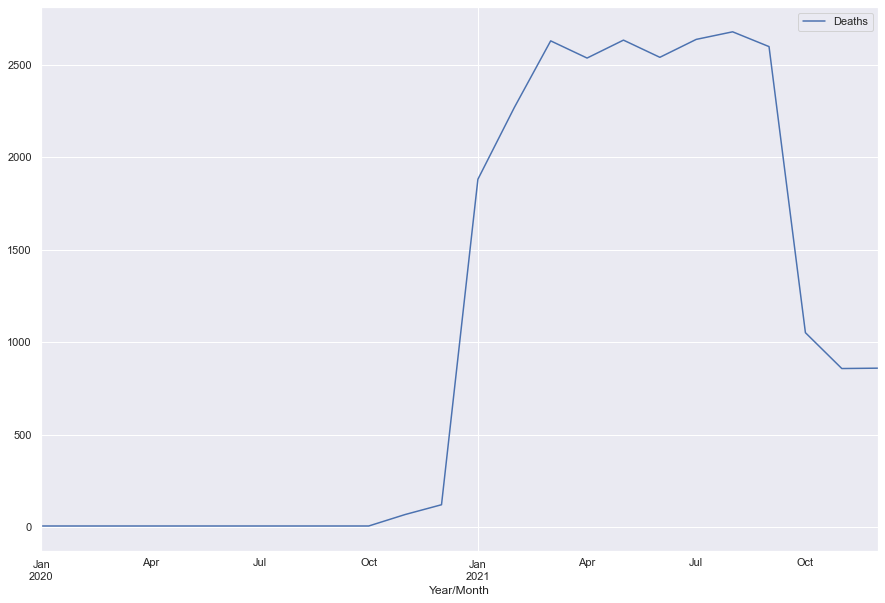

In [110]:
gibr.plot(x="Year/Month", y="Deaths")

<AxesSubplot:xlabel='Year/Month'>

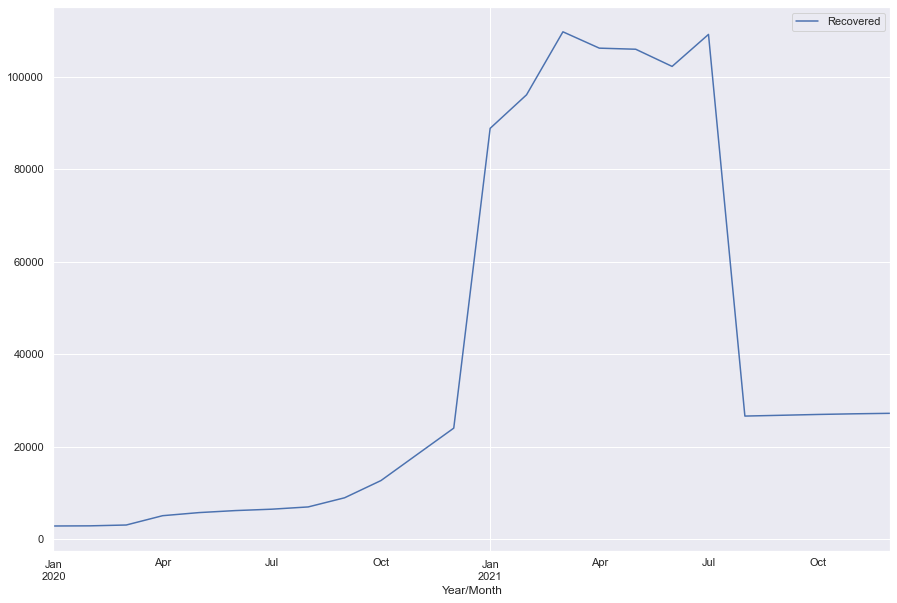

In [112]:
gibr.plot(x="Year/Month", y="Recovered")

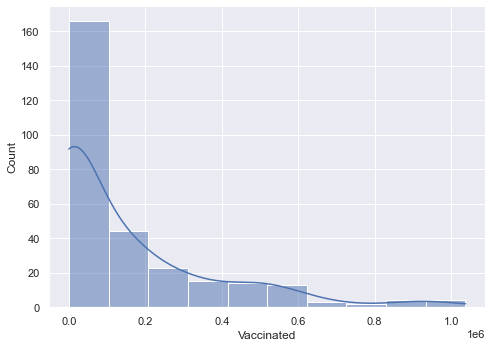

In [97]:
ax = sns.displot(data=monthly, x="Vaccinated", bins=10, kind='hist', 
                 palette='GnBu', aspect=1.4, kde=True)

plt.show()

***Notes and observations:***
Your observations here. (Double click to edit)

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

### 5) External data: Analyse the Twitter data
In the next section, I was supplied with a sample file and the question was asked to determine whether there are additional #tags or keywords that could potentially provide insights into your covid analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar datasets to provide richer insights.

#### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data
- Search for hash-tags or keywords
- Create dataframes and visualisations
- Note observations

In [116]:
# Import the tweet dataset (`tweets_2.csv`)
tweets = pd.read_csv("tweets_2.csv")

In [ ]:
# Explore the data: info(), head()
tweets.info()

In [117]:
tweets.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Mon Mar 21 21:45:28 +0000 2022,1506024218571464717,1506024218571464717,@Johnrashton47 When #diabetes has been the big...,True,"{'hashtags': [{'text': 'diabetes', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.505660e+18,1.505660e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Mon Mar 21 21:31:13 +0000 2022,1506020629849391104,1506020629849391104,Disturbing figures from @fsb_policy @indparltr...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,4,3,False,False,en,False,NaN,NaN,NaN,NaN
2,Mon Mar 21 19:04:53 +0000 2022,1505983803822592004,1505983803822592004,NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...,True,"{'hashtags': [{'text': 'Stormont', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,2,9,False,False,en,False,NaN,NaN,NaN,NaN
3,Mon Mar 21 18:39:58 +0000 2022,1505977533841481731,1505977533841481731,I'm do sick of coming on twitter to see the sa...,True,"{'hashtags': [{'text': 'borisOut', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Mon Mar 21 18:23:08 +0000 2022,1505973299502850052,1505973299502850052,The rollout of new #COVID19 #Booster jabs to #...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,1,False,False,en,False,NaN,NaN,NaN,NaN


In [121]:
# Create a dataframe with the text only
tweets_txt = tweets.text
tweets_txt = tweets['text']

In [122]:
tweets_txt.head()

0    @Johnrashton47 When #diabetes has been the big...
1    Disturbing figures from @fsb_policy @indparltr...
2    NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...
3    I'm do sick of coming on twitter to see the sa...
4    The rollout of new #COVID19 #Booster jabs to #...
Name: text, dtype: object

In [124]:
# Explore the structure, count the tweets, get the elements of interest
len(tweets.index)

100

In [144]:
tweets_hashtags = tweets_txt.str.extractall(r'(?P<Hashtags>\#\w*)')

In [145]:
hashtags= tweets_txt.str.extractall(r'(?P<Hashtags>\#\w+)').value_counts()
print(hashtags)

Hashtags                
#COVID19                    55
#covid19                     7
#coronavirus                 3
#CovidIsNotOver              3
#Brexit                      2
#China                       2
#covid                       2
#Russia                      2
#Partygate                   2
#Ukraine                     2
#WARINUKRAINE                1
#accentuatethepositive       1
#covid19UK                   1
#banking                     1
#University                  1
#bestadvice                  1
#borisOut                    1
#breaking                    1
#carehomes                   1
#competition                 1
#Uganda                      1
#coronavirusuk               1
#UniversityofWestminster     1
#Athens                      1
#fieldsinger                 1
#diabetes                    1
#fieldsing                   1
#vaccinations                1
#training                    1
#testingpositive             1
#spreadjoy                   1
#sleep        

In [158]:
hash_df = hashtags.to_frame(name = 'Hashtags_total')
hash_df.head()

,Hashtags_total
Hashtags,
#COVID19,55
#covid19,7
#coronavirus,3
#CovidIsNotOver,3
#Brexit,2


In [160]:
hash_df.reset_index(inplace=True)

In [165]:
hash_covid =['covid', 'corona', 
             'vaccination',  
             'booster', 'hospital'
             'ppe', 'pandemic',
             'nhs', 'masks', 'diabetes']  

def matcher(x):     
    for i in hash_covid:         
        if i.lower() in x.lower():            
            return i     
        else:         
            return np.nan  
        
hash_df['Match'] = hash_df['Hashtags'].apply(matcher)

In [181]:
hash_df.head(30)

,Hashtags,Hashtags_total,Match
0,#COVID19,55,covid
1,#covid19,7,covid
2,#coronavirus,3,NaN
3,#CovidIsNotOver,3,covid
4,#Brexit,2,NaN
5,#China,2,NaN
6,#covid,2,covid
7,#Russia,2,NaN
8,#Partygate,2,NaN
9,#Ukraine,2,NaN


In [174]:
hash_filtered=hash_df[hash_df['Hashtags'].apply(lambda x: "covid" in x.lower())]
hash_filtered

,Hashtags,Hashtags_total,Match
0,#COVID19,55,covid
1,#covid19,7,covid
3,#CovidIsNotOver,3,covid
6,#covid,2,covid
12,#covid19UK,1,covid
41,#fuckcovid,1,covid
47,#Covid_19,1,covid
55,#CovidVaccination,1,covid
57,#Covid19,1,covid
60,#COVID,1,covid


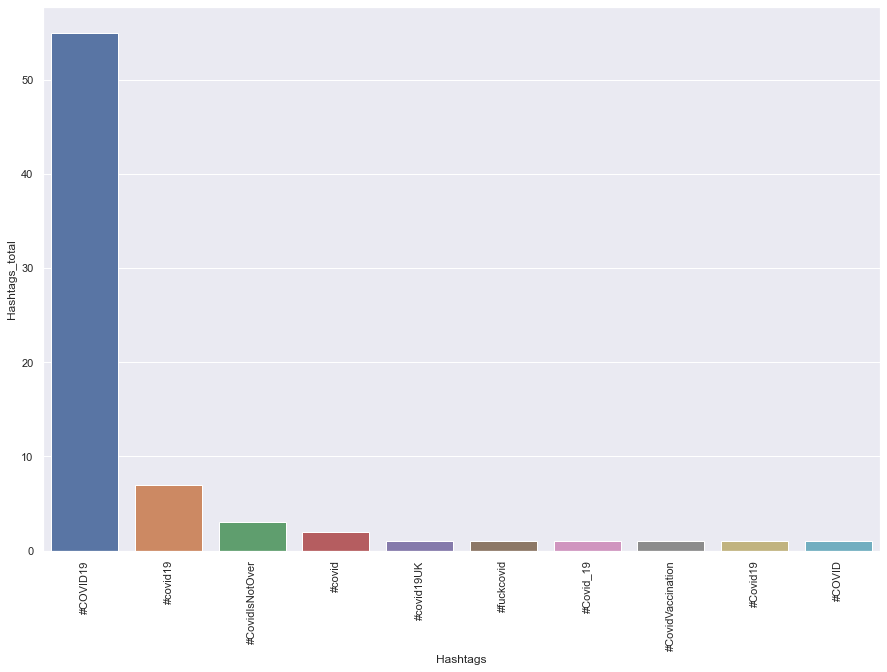

In [179]:
sns.barplot(x="Hashtags", y="Hashtags_total", data=hash_filtered)
plt.xticks(rotation=90)
plt.show()

In the twitter analysis we were supplied with data from twitter on a specific day, the 21st of March 2021. In this particular day there were many hashtags from the general twitter users regarding to covid sentiment. From all the tweets extracted the main trend or sentiment of the day was on the word COVID as the biggest numbers of comments on the day. The sample set is limited, but the data file provide some insights of the talk of the day.

In [183]:
trending=hash_df.head(10)
trending

,Hashtags,Hashtags_total,Match
0,#COVID19,55,covid
1,#covid19,7,covid
2,#coronavirus,3,NaN
3,#CovidIsNotOver,3,covid
4,#Brexit,2,NaN
5,#China,2,NaN
6,#covid,2,covid
7,#Russia,2,NaN
8,#Partygate,2,NaN
9,#Ukraine,2,NaN


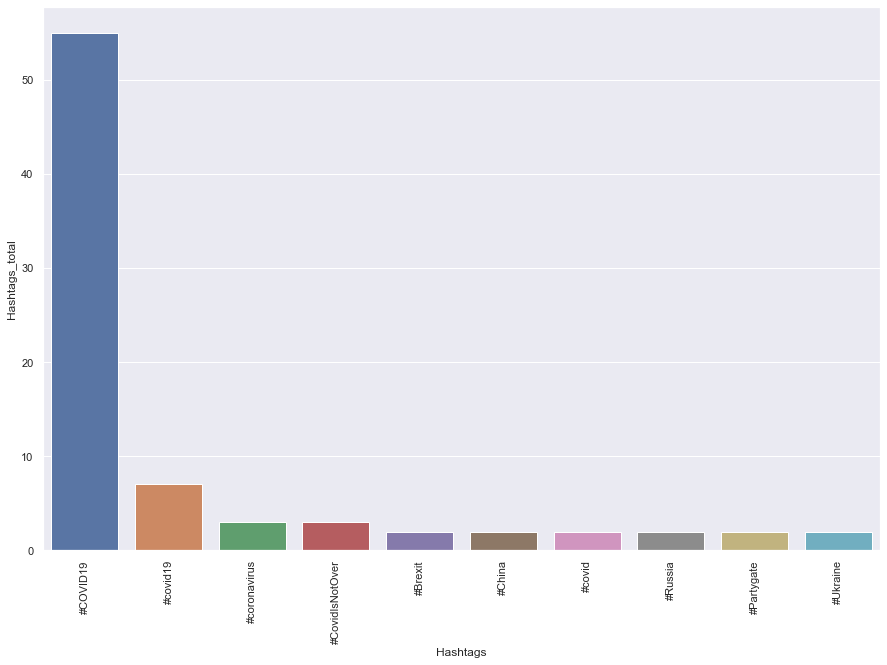

In [184]:
sns.barplot(x="Hashtags", y="Hashtags_total", data=trending)
plt.xticks(rotation=90)
plt.show()

From the last graph we see what other popular topics were trending on twitter on the same day appart from covid. 
In 5th position was Brexit, followed by China, Rusia, Party gate and Ukraine. 

#### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

## Partial notebook

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that was developed by the consultant. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

### 6) Perform time-series analysis

#### 6.1) Report expectations:
- Demonstrate using external function and interpret results
- Note observations

In [185]:
# You can copy and paste the relevant code cells from the provided template here.

# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [186]:
# Load and select relevant subset of the data.
# Make sure to change the relative path to function in your environment.
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [188]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]
sample_ci.head()

,Province/State,Date,Hospitalised
2528,Channel Islands,22/01/2020,0.0
2529,Channel Islands,23/01/2020,0.0
2530,Channel Islands,24/01/2020,0.0
2531,Channel Islands,25/01/2020,0.0
2532,Channel Islands,26/01/2020,0.0


In [189]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [190]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:
The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, plot_moving_average(), to plot the data for the selected province (variable name is sample_ci and set the window parameter to 7 days.

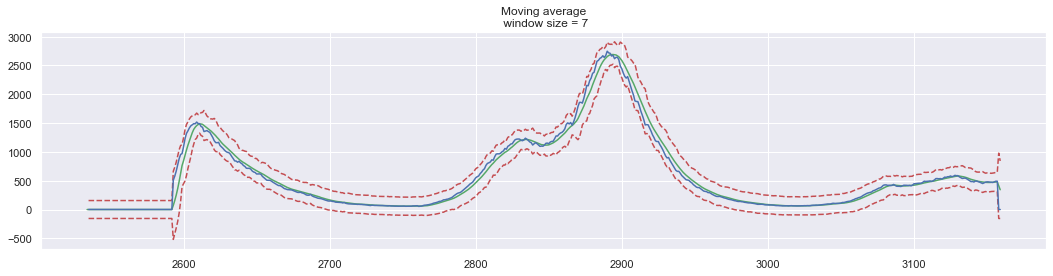

In [191]:
# Demonstrate the use of the function to plot moving averages

# YOUR CODE HERE
# 7-days smoothing
plot_moving_average(sample_ci.Hospitalised,7, plot_intervals=True)

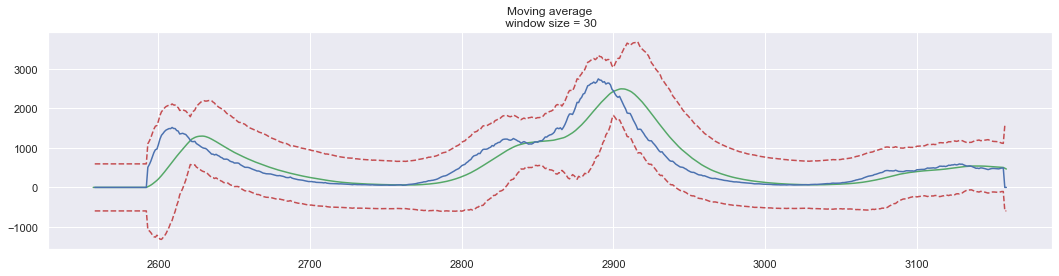

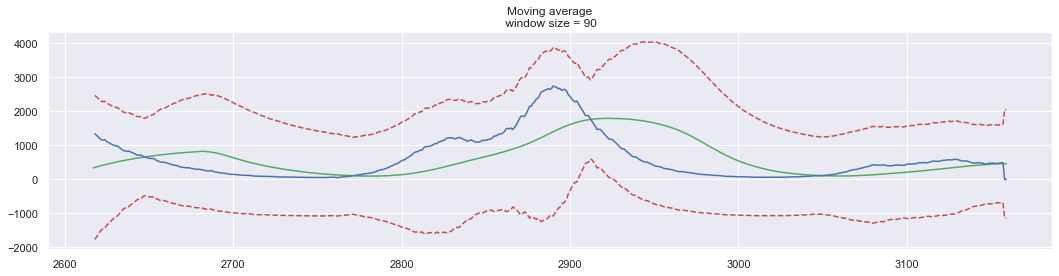

In [192]:
# Demonstrate the use of the function to plot moving averages

# 30-days smoothing
plot_moving_average(sample_ci.Hospitalised, 30, plot_intervals=True)

# 90-days smoothing
plot_moving_average(sample_ci.Hospitalised, 90, plot_intervals=True)
# MODEL ANSWER END

### Question 2:
The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [193]:
# Return top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,27/03/2020,509.0,436.285714
2594,Channel Islands,28/03/2020,579.0,423.571429
2595,Channel Islands,29/03/2020,667.0,416.285714


As the government wants us to focus on hospitals' needs, to be prepared for any upcoming surges in hospitalisations, specifically in the Channel Islands region, the consultant tried to show the top three days with biggest difference between daily value and rolling 7-day mean while calculating the top three days with biggest difference between daily value and rolling 7-days mean.
The standard deviation measures the amount of variability to the mean, while the standard error measures how far the sample mean of the data is likely to be from the true population mean.

#### What he did above was:
- With the second code, he created a rolling windon to calculate the rolling mean but in this case for 7 days only, using the series.rolling function.        
        rolling_mean = series.rolling(window=7).mean()
- With the third code he created a new column, then calculated the mean, but the mean absolute error or MAE, also for 7 days.
       sample_ci['Error'] = mean_absolute_error(sample_ci[['Hospitalised']].mean(axis = 1)       
- With the fourth code he sort the 7 days values from the smallest to the highest 

#### What do you think the consultant was trying to achieve with the two functions in the Jupyter Notebook provided? 

### Question 3:

The management team had some additional questions around the project where they asked for additional feedback to be included in your final presentation. Make sure to answer the questions in the notebook in markdown format in preparation for your presentation. They expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data and how can this be used in predictions?


Qualitative forecasting methods are based on the opinion and judgments of consumers and experts, they are useful if we have insufficient historic data to make any statistically relevant conclusions. However collecting this sort of date tend to be expensive due to the unavailability of historic data.
 
Quantitative methods involve learning patterns from data to help us better understand how a process works, or to predict future events.
Quantitative forecasting is concerned with numerical data that is quantifiable for statistical analysis. This forecasting is effective when there is accurate historic data available and predict the probability of future events easier.

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

People in general needs time to innovate and find continuous improvement opportunities. Experimentation with no clear or measurable returns are beneficial, it help us to balance risks and uncertainty. Time to innovate in personal project helps people to focus and assess their strengths and weaknesses.

#### Question 3.2 (double click cell to edit)
- We adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics. We only work with aggregated data and therefore will not expose any personal details? (is it different, example of how it could apply to this case; two or three sentences max)
 
We shoudn't ignore data ethics. Data ethics is a branch of ethics and a perfect framework to minimise risks related to data use. Good ethical choices and acting in the best interest of the community will send out positive ripples through our network and the wider community. In this case even if data is aggregated we should be conscious of the implication of its content or results.

#### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. We have covered everything from a data ethics standpoint, correct? There’s nothing else we need to implement from a data ethics perspective, right?